# <center> Keras model on all features </center>

## Import data

In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler # Used for scaling of data
import matplotlib.pyplot as plt

In [2]:
# Read in train data
trainfull = pd.read_csv('trainfull_ohe.csv', index_col=0)
trainfull

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,0,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,0,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,0,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,0,1,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,1,0,0,0,0,0
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
train = pd.read_csv('train_ohe.csv', index_col=0)
val = pd.read_csv('val_ohe.csv', index_col=0)

In [4]:
train = train.fillna(0)
val = val.fillna(0)

Create inputs and output for train and val set 

In [5]:
col_train = list(train.columns)
col_train.remove('SalePrice')
Features = col_train
X_train = train[Features]
X_val = val[Features]

In [6]:
y_train = train['SalePrice'].values
y_val = val['SalePrice'].values

Standardise the data

In [7]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)

/opt/conda/envs/tf2/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/tf2/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
scale = StandardScaler()
X_val = scale.fit_transform(X_val)

/opt/conda/envs/tf2/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/tf2/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Create, compile and fit the Model

In [9]:
#pip install keras

In [10]:
import keras
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adadelta, Adam
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l1

seed = 7
np.random.seed(seed)
#tf.set_random_seed(seed)
tf.random.set_seed(seed)

# Model
model = Sequential()
#model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(200, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_absolute_error', optimizer=Adadelta())

history = model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=150, batch_size=10)

Using TensorFlow backend.


Train on 1168 samples, validate on 292 samples
Epoch 1/150
1168/1168 [==============================] - 1s 607us/step - loss: 181441.5423 - val_loss: 178839.8106
Epoch 2/150
1168/1168 [==============================] - 1s 448us/step - loss: 181441.5419 - val_loss: 178839.8106
Epoch 3/150
1168/1168 [==============================] - 1s 449us/step - loss: 181441.5416 - val_loss: 178839.8105
Epoch 4/150
1168/1168 [==============================] - 1s 448us/step - loss: 181441.5415 - val_loss: 178839.8105
Epoch 5/150
1168/1168 [==============================] - 1s 497us/step - loss: 181441.5404 - val_loss: 178839.8105
Epoch 6/150
1168/1168 [==============================] - 1s 445us/step - loss: 181441.5387 - val_loss: 178839.8094
Epoch 7/150
1168/1168 [==============================] - 1s 448us/step - loss: 181441.5368 - val_loss: 178839.8057
Epoch 8/150
1168/1168 [==============================] - 1s 442us/step - loss: 181441.5321 - val_loss: 178839.8014
Epoch 9/150
1168/1168 [==========

1168/1168 [==============================] - 1s 462us/step - loss: 181402.7334 - val_loss: 178790.3949
Epoch 72/150
1168/1168 [==============================] - 1s 488us/step - loss: 181368.0669 - val_loss: 178737.3561
Epoch 73/150
1168/1168 [==============================] - 1s 483us/step - loss: 181258.2372 - val_loss: 178531.1390
Epoch 74/150
1168/1168 [==============================] - 1s 490us/step - loss: 180381.5735 - val_loss: 175394.8389
Epoch 75/150
1168/1168 [==============================] - 1s 462us/step - loss: 83288.2481 - val_loss: 28121.9138
Epoch 76/150
1168/1168 [==============================] - 1s 444us/step - loss: 25886.5102 - val_loss: 24397.8603
Epoch 77/150
1168/1168 [==============================] - 1s 453us/step - loss: 21244.4009 - val_loss: 29992.5068
Epoch 78/150
1168/1168 [==============================] - 1s 442us/step - loss: 19531.2923 - val_loss: 21807.2239
Epoch 79/150
1168/1168 [==============================] - 1s 458us/step - loss: 17851.7514 - 

1168/1168 [==============================] - 1s 432us/step - loss: 13318.4960 - val_loss: 18292.4611
Epoch 143/150
1168/1168 [==============================] - 1s 464us/step - loss: 13313.2915 - val_loss: 18290.7754
Epoch 144/150
1168/1168 [==============================] - 1s 436us/step - loss: 13308.2413 - val_loss: 18289.5898
Epoch 145/150
1168/1168 [==============================] - 1s 514us/step - loss: 13303.4869 - val_loss: 18286.8802
Epoch 146/150
1168/1168 [==============================] - 1s 533us/step - loss: 13298.4289 - val_loss: 18284.2999
Epoch 147/150
1168/1168 [==============================] - 1s 450us/step - loss: 13293.2485 - val_loss: 18283.0328
Epoch 148/150
1168/1168 [==============================] - 1s 432us/step - loss: 13288.3925 - val_loss: 18281.0671
Epoch 149/150
1168/1168 [==============================] - 1s 445us/step - loss: 13283.5255 - val_loss: 18277.5430
Epoch 150/150
1168/1168 [==============================] - 1s 430us/step - loss: 13278.4821 - 

In [11]:
# Evaluation on the training set
model.evaluate(X_train, y_train)

1168/1168 [==============================] - 0s 81us/step


13271.538099315068

## Learning Curve

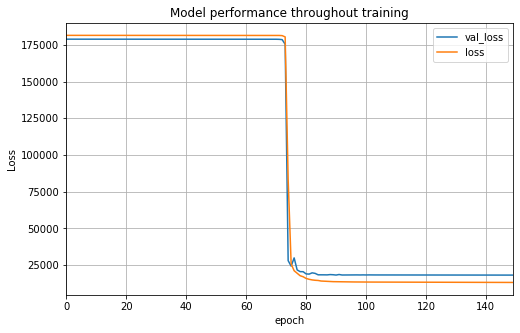

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## Prediction on Val

In [13]:
y_val_predict = model.predict(X_val)
y_val_predict

array([[153444.22 ],
       [335497.53 ],
       [104833.68 ],
       [155699.5  ],
       [331167.47 ],
       [ 80169.625],
       [223595.62 ],
       [153480.75 ],
       [ 77004.94 ],
       [129745.195],
       [151617.66 ],
       [123346.625],
       [123723.914],
       [203029.62 ],
       [164418.66 ],
       [134921.   ],
       [189217.2  ],
       [143198.33 ],
       [113314.59 ],
       [214567.25 ],
       [176109.19 ],
       [202765.84 ],
       [179270.86 ],
       [128528.17 ],
       [200684.42 ],
       [148544.33 ],
       [187335.22 ],
       [101194.016],
       [175674.11 ],
       [204053.45 ],
       [112049.33 ],
       [270594.47 ],
       [176373.1  ],
       [105265.73 ],
       [265678.75 ],
       [146787.92 ],
       [139863.7  ],
       [206900.44 ],
       [295497.8  ],
       [ 91498.77 ],
       [137126.14 ],
       [235394.64 ],
       [112550.71 ],
       [361180.2  ],
       [132479.78 ],
       [143952.05 ],
       [105834.36 ],
       [13659

## Compute MAE, RMSE

In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_val, y_val_predict)

18275.47175995291

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt
root_mean_squared_error = sqrt(mean_squared_error(y_val, y_val_predict))
print(root_mean_squared_error)

29925.44840572048


## Preparation of the test and Prediction

In [16]:
test = pd.read_csv('test_ohe.csv')
test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0


In [17]:
test = test.fillna(0)

In [18]:
id_col = test['Id'].values.tolist()
scale = StandardScaler()
X_test = test[Features]
X_test = scale.fit_transform(X_test)

/opt/conda/envs/tf2/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/tf2/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [19]:
prediction = model.predict(X_test)

In [20]:
submission = pd.DataFrame()
submission['Id'] = id_col
submission['SalePrice'] = prediction
submission.to_csv('prediction_keras_allfeat_ohe.csv', index=False)

# Score Kaggle
<center> Optimizer Adam (lr=0,01): </center> 
Dense 128, 1 : 0.41727  

Dense 200, 100, 50, 25, 1 : 0.24114
<center> Optimizer Adadelta: </center>  
Dense 200, 100, 50, 25, 1 : 0.15647  